In [1]:
# 1.Create a class 'Solow' with attributes being the parameters of the model (n, s, 𝛿, 𝛼, g);
class Solow:
    def __init__(self, n, s, 𝛿, 𝛼, g):
        self.n, self.s, self.𝛿, self.𝛼, self.g = n, s, 𝛿, 𝛼, g
        
    # 2. Add a method which calculates the RHS of the equation (1), given a value for  𝑘𝑡    
    def calc_next_k(self,k_t):
        return ((self.s*(k_t**self.𝛼) + (1-self.𝛿)*k_t)/((1+self.g)*(1+self.n)))
    
    # 3.Add a method that updates the current value of k_t
    def update_k_t(self, k_t):
        k_t = self.calc_next_k(k_t)
        return k_t
    # 4.Add a method that generates a sequence of values for k_t, for t periods
    def gen_k_sequence(self, k_t, t):
        k_sequence = [k_t]
        for index in range(t):
            k_sequence.append(self.calc_next_k(k_sequence[index]))
        return k_sequence
    
    # 5.Add a method that calculates the steady state
    def calc_steady_state(self):
        return ((self.s)/(self.g + self.n + self.δ + self.g * self.n)) ** (1 / (1 - self.α))   
    
    # 6. Add a method that computes the value of the aggregate variables from a value of  𝑘, 𝐴, and 𝐿
    def calc_aggregate(self, k_t, A_t, L_t):
        agg_var = {}
        K_t = k_t * A_t * L_t
        Y_t = ((k_t * A_t * L_t)**(self.𝛼) * (A_t * L_t)**(1-self.𝛼))
        I_t = Y_t * self.s
        C_t = Y_t * (1-self.s)
        agg_var['K'], agg_var['Y'], agg_var['I'], agg_var['C'] = K_t, Y_t, I_t, C_t
        return agg_var 
    
    # 7. Add a method that computes the per worker variables.
    def calc_per_worker(self, k_t, A_t, L_t):
        agg_var = self.calc_aggregate(k_t, A_t, L_t)
        denominator = A_t*L_t
        pw_var = {} #per-worker variables
        y_t = agg_var["Y"]/denominator #output per efficient worker
        c_t = agg_var["C"]/denominator #consumption per efficient worker
        i_t = agg_var["I"]/denominator #investment per efficient worker
        
        pw_var['k'], pw_var['y'], pw_var['i'], pw_var['c'] = k_t,y_t,i_t,c_t

        return pw_var

    # 8. Add a method that generates a series of per worker variables¶.
    def gen_per_worker_seq(self, k_t, A_t, L_t, t):
        pw_sequence = [] #k, y, i, c
        for index in range(t):
            pw_var = self.calc_per_worker(k_t, A_t, L_t)
            pw_sequence.append(pw_var) #entry starts from period 0
            #update
            k_t = self.calc_next_k(k_t) #* A_t
            A_t = (1+self.g)*A_t
            L_t = (1+self.n)*L_t
        
        return pw_sequence
    
    #For step 9, produce a dictionary of 4 lists 
    def gen_per_worker_seq2(self, k_t, A_t, L_t, t):
        pw_sequence = {'k':[], 'y':[], 'i':[], 'c':[]}
        keys = list(pw_sequence.keys())
        
        for index in range(t):
            pw_var = self.calc_per_worker(k_t, A_t, L_t)
            for k in keys:
                pw_sequence[k].append(pw_var[k])
            
            #update
            k_t = self.calc_next_k(k_t)
            A_t = (1+self.g)*A_t
            L_t = (1+self.n)*L_t
        
        return pw_sequence
    
    #For output per worker instead of per efficient worker
    def calc_per_worker2(self, k_t, A_t, L_t):
        agg_var = self.calc_aggregate(k_t, A_t, L_t)
        denominator = L_t #no more A_t
        pw_var = {} #per worker variables
        y_t = agg_var["Y"]/denominator #output per worker
        c_t = agg_var["C"]/denominator #consumption per worker
        i_t = agg_var["I"]/denominator #investment per worker
        
        pw_var['k'], pw_var['y'], pw_var['i'], pw_var['c'] = k_t,y_t,i_t,c_t

        return pw_var
            
    def gen_per_worker_seq3(self, k_t, A_t, L_t, t):
        pw_sequence = {'k':[], 'y':[], 'i':[], 'c':[]}
        keys = list(pw_sequence.keys())
        
        for index in range(t):
            pw_var = self.calc_per_worker2(k_t, A_t, L_t)
            for k in keys:
                pw_sequence[k].append(pw_var[k])
            
            #update
            k_t = self.calc_next_k(k_t)
            A_t = (1+self.g)*A_t
            L_t = (1+self.n)*L_t
        
        return pw_sequence

In [ ]:
#Instance
economy = Solow(n=0.03, s =0.25 , 𝛿 =0.1 , 𝛼 =0.3 , g=0.02)

In [ ]:
economy.calc_steady_state()

In [ ]:
economy.gen_per_worker_seq(k_t=1, A_t=1, L_t=100, t=3)

In [ ]:
economy.gen_per_worker_seq2(k_t = 1, A_t = 1, L_t = 100, t = 3)

In [ ]:
economy.gen_per_worker_seq3(k_t = 1, A_t = 1, L_t = 100, t = 3)

Task 9: Scenario Analysis:

A: labour-augmenting technological progress: it scales up labour input N
g: technology growth rate. Also the growth rate for k and y

2 possible scenarios: 
1) Same A, different g —> different steady states; closed economy, no communication
2) Different A, same g —> open economy, copy at no costs; convergence 


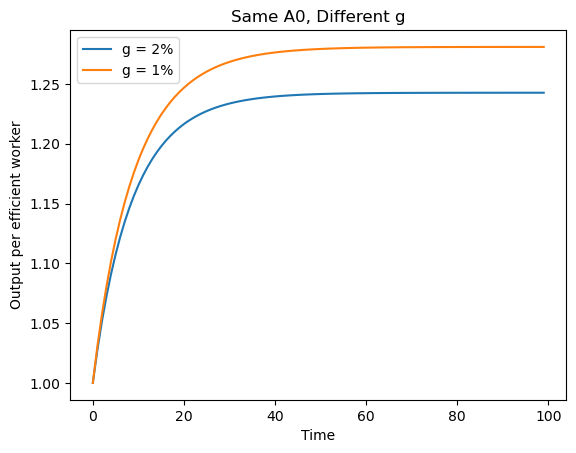

In [2]:
import matplotlib.pyplot as plt
import numpy as np

economy1 = Solow(n=0.03, s =0.25 , 𝛿 =0.1 , 𝛼 =0.3 , g=0.02)
economy2 = Solow(n=0.03, s =0.25 , 𝛿 =0.1 , 𝛼 =0.3 , g=0.01)
time = 100
x_var = list(range(time))

y_1 = economy1.gen_per_worker_seq2(k_t = 1, A_t = 1, L_t = 100, t = time)['y']
y_2 = economy2.gen_per_worker_seq2(k_t = 1, A_t = 1, L_t = 100, t = time)['y']


plt.plot(x_var, y_1, label = 'g = 2%')
plt.plot(x_var, y_2, label = 'g = 1%')
plt.title('Same A0, Different g')
plt.xlabel("Time")
plt.ylabel("Output per efficient worker")
plt.legend()
plt.show()

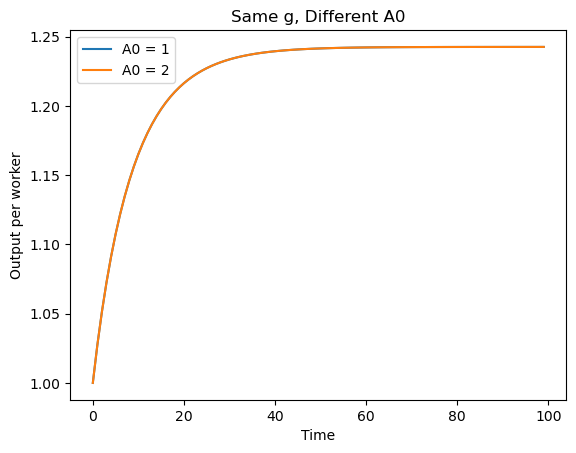

In [3]:
#Same g, different A0. Plot Output per efficient worker over time 

y_3 = economy1.gen_per_worker_seq2(k_t = 1, A_t = 1, L_t = 100, t = time)['y']
y_4 = economy1.gen_per_worker_seq2(k_t = 1, A_t = 2, L_t = 100, t = time)['y']

plt.plot(x_var, y_3, label = 'A0 = 1')
plt.plot(x_var, y_4, label = 'A0 = 2')
plt.title('Same g, Different A0')
plt.xlabel("Time")
plt.ylabel("Output per worker")
plt.legend()
plt.show()

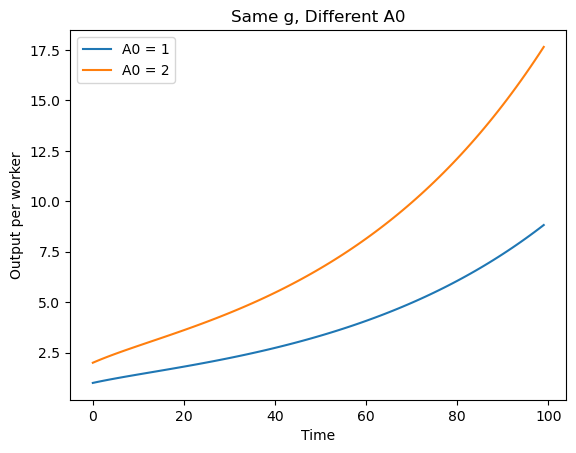

In [4]:
#Same g, different A0. Plot Output per worker over time 

y_5 = economy1.gen_per_worker_seq3(k_t = 1, A_t = 1, L_t = 100, t = time)['y']
y_6 = economy1.gen_per_worker_seq3(k_t = 1, A_t = 2, L_t = 100, t = time)['y']

plt.plot(x_var, y_5, label = 'A0 = 1')
plt.plot(x_var, y_6, label = 'A0 = 2')
plt.title('Same g, Different A0')
plt.xlabel("Time")
plt.ylabel("Output per worker")
plt.legend()
plt.show()

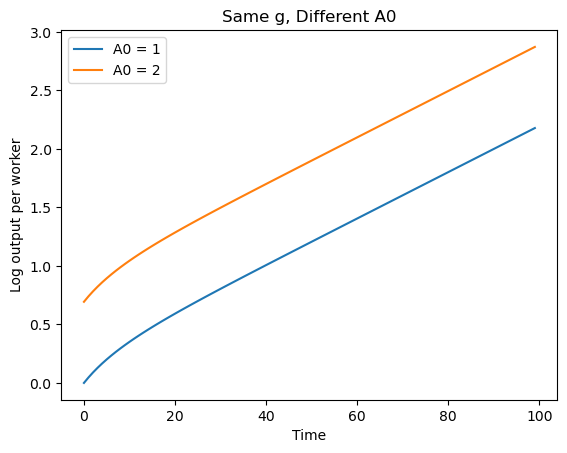

In [6]:
#Same g, different A0. Plot log output per worker over time 

y_7 = np.log(economy1.gen_per_worker_seq3(k_t = 1, A_t = 1, L_t = 100, t = time)['y'])
y_8 = np.log(economy1.gen_per_worker_seq3(k_t = 1, A_t = 2, L_t = 100, t = time)['y'])

plt.plot(x_var, y_7, label = 'A0 = 1')
plt.plot(x_var, y_8, label = 'A0 = 2')
plt.title('Same g, Different A0')
plt.xlabel("Time")
plt.ylabel("Log output per worker")
plt.legend()
plt.show()